# Data Cleaning and Exploratory

First, I will import all the relevant dependencies.

In [2]:
import numpy as np, pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config IPCompleter.greedy=True

In [3]:
train = pd.read_csv('datasets/train.csv')

Skewness: 1.557551
Kurtosis: 3.579003


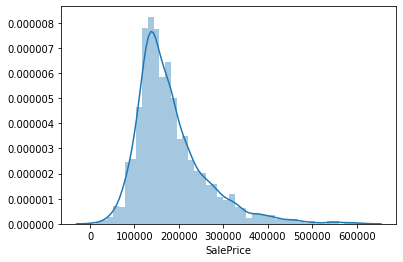

In [4]:
sns.distplot(train['SalePrice']);
print('Skewness: %f' %  train['SalePrice'].skew())
print('Kurtosis: %f' %  train['SalePrice'].kurtosis())

The distribution of the sale price is skewed to the right.

In [5]:
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)

In [7]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Explore the data for null values.

In [8]:
(train.isnull().sum()[train.isnull().sum() > 0] / train.shape[0]*100).sort_values(ascending=False)

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Cars        0.048757
BsmtFin SF 1       0.048757
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Garage Area        0.048757
Total Bsmt SF      0.048757
dtype: float64

In [9]:
(train.isnull().sum()[train.isnull().sum()>0]).sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [10]:
null_counts = train.isnull().sum()
null_counts[null_counts > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

# Id

In [11]:
#drop column as it is a type of identifier
train.drop('Id',axis=1,inplace=True)

# PID

In [12]:
#drop column as it is a type of identifier
train.drop('PID',axis=1,inplace=True)

# Lot Frontage (Continuous)

In [13]:
# definition of Frontage
# https://www.gimme-shelter.com/frontage-50043/

As Lot Frontage

In [14]:
# convert all null values to the median of the same subclass and lot shape
train['Lot Frontage'] = train.groupby(['MS SubClass','Lot Shape'])['Lot Frontage'].transform( lambda x: x.fillna(x.median()))

In [15]:
train.loc[train['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
430,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,239.0,Unf,0.0,312.0,551.0,GasA,Ex,Y,SBrkr,551,551,0,1102,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,Unf,2.0,480.0,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,148800
1515,150,RL,NaN,1700,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,Twnhs,1.5Fin,7,5,1980,1981,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,397.0,Unf,0.0,33.0,430.0,GasA,TA,Y,SBrkr,880,680,140,1700,1.0,0.0,2,1,2,1,Gd,7,Typ,0,NaN,Basment,1980.0,Fin,1.0,450.0,Gd,TA,Y,188,36,0,0,200,0,NaN,NaN,NaN,0,4,2006,WD,148400
1721,80,RL,NaN,11454,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,SLvl,8,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,302.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,770.0,Unf,0.0,631.0,1401.0,GasA,Ex,Y,SBrkr,1511,0,0,1511,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1995.0,Fin,3.0,811.0,TA,TA,Y,168,42,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,225000
1735,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,6,3,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,1237.0,Unf,0.0,420.0,1657.0,GasA,Gd,Y,SBrkr,1657,0,0,1657,0.0,1.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1970.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,147,0,NaN,NaN,NaN,0,3,2007,WD,163500


We will use the median to assign the median value to the remainder of the null values.

In [16]:
train['Lot Frontage'].fillna(train['Lot Frontage'].median(),inplace=True)

# Alley (Nominal)

1911 null values discovered.

In [17]:
train['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

Nan is a valid data as it represents no alley access to the property. Hence, all nan values will be replaced with 'Na'

In [18]:
train['Alley'].fillna('Na',inplace=True)

In [19]:
# confirm if null values have been replaced
train['Alley'].isnull().sum()

0

# Mas Vnr Type

As Masonry Veneer Type can never be 0,... ...

In [20]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

As most properties have a 'None' value for Mas Vnr Type, I will be assigning 'None' to all the null values in this column.

In [21]:
train['Mas Vnr Type'].fillna('None',inplace=True)

# Mas Vnr Area

If the property is not using Mas Vnr Type materials, then Mas Vnr Area should be 0. Hence I will be assigning all null values to 0.0 and also filter for any properties with 'None' value but has a Mas Vnr Area > 0.

In [22]:
train['Mas Vnr Area'].fillna(0.0,inplace=True)

In [23]:
train.loc[(train['Mas Vnr Area']>0) & (train['Mas Vnr Type']=='None')]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
765,90,RL,73.0,18890,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,190000
810,60,RL,80.0,10400,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247.0,Unf,0.0,485.0,732.0,GasA,Gd,Y,SBrkr,1012,778,0,1790,1.0,0.0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2.0,484.0,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,165150
1148,20,RL,70.0,10150,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,912,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,114500
1684,20,RM,52.0,8626,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,1.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,104500
1832,60,RL,74.0,10762,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694.0,Unf,0.0,284.0,978.0,GasA,Ex,Y,SBrkr,1005,978,0,1983,0.0,0.0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2.0,490.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,225000


In [24]:
train.iloc[[765],25] = train.iloc[[765],25].replace(1.0,0.0)

In [25]:
train.iloc[[810],25] = train.iloc[[810],25].replace(288.0,0.0)

In [26]:
train.iloc[[1148],25] = train.iloc[[1148],25].replace(1.0,0.0)

In [27]:
train.iloc[[1684],25] = train.iloc[[1684],25].replace(1.0,0.0)

In [28]:
train.iloc[[1832],25] = train.iloc[[1832],25].replace(344.0,0.0)

# Basement Variables

Check if generally the number of properties with no basement is actually 55

# Bsmt Exposure

In [29]:
train.loc[(train['Bsmt Exposure'].isnull()) & (train['Bsmt Qual'].notnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,60,FV,81.0,10411,Pave,Na,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,20,RL,73.0,8987,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,60,RL,65.0,14006,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


In [30]:
# there are basements for the 3 rows above, just no basement exposure
# hence, replace null values with 'No' as there is no basement exposure

In [31]:
train.iloc[[1456,1547,1997],[31]] = train.iloc[[1456,1547,1997],[31]].fillna('No')

In [32]:
# find the other 55 properties that have no basement.
train.loc[(train['Bsmt Exposure'].isnull()) & (train['Bsmt Qual'].isnull())].shape

(55, 79)

In [33]:
# replace null values for 55 properties that have no basement. 
train['Bsmt Exposure'].fillna('Na',inplace=True)

In [34]:
train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', 'Na', 'Mn'], dtype=object)

In [35]:
train.replace({'Bsmt Exposure':{'Na':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}},inplace=True)

# BsmtFin Type 1 (Categorical)

In [36]:
# confirm that the number of null values that signify 'No Basement' shows 55
train.loc[(train['BsmtFin Type 1'].isnull()) & (train['Bsmt Qual'].isnull())].shape

(55, 79)

In [37]:
# replace all null values with 'Na'
train['BsmtFin Type 1'].fillna('Na',inplace=True)

# BsmtFin SF 1 (Continuous)

In [38]:
train.loc[train['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [39]:
train['BsmtFin SF 1'].fillna(0.0,inplace=True)

# BsmtFin Type 2 (Categorical)

As there are 56 null values for BsmtFin Type 2, we have to investigate the additional property with null value.

In [40]:
train.loc[(train['BsmtFin Type 2'].isnull()) & (train['Bsmt Qual'].notnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,20,RL,85.0,10655,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,2,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000


This property has a basement finished square feet type 2, hence basement finished type 2 cannot be a null value nor "No Basement". In addition, since basement finish type one is 'GLQ', basement finished type 2 cannot be 'GLQ' too. To assign a valid value to basement finished type 2, we will look at the type of basement type 2 finished that is the most popular with the basement quality and basement finished type 1.

In [41]:
train.groupby(['Bsmt Qual','BsmtFin Type 1'])['BsmtFin Type 2'].apply(stats.mode)

Bsmt Qual  BsmtFin Type 1
Ex         ALQ                 ([Unf], [3])
           GLQ               ([Unf], [139])
           LwQ                 ([ALQ], [1])
           Rec                 ([GLQ], [1])
           Unf                ([Unf], [37])
Fa         ALQ                 ([Unf], [4])
           BLQ                 ([Unf], [3])
           LwQ                 ([Unf], [9])
           Rec                 ([Unf], [4])
           Unf                ([Unf], [38])
Gd         ALQ                ([Unf], [84])
           BLQ                ([Unf], [20])
           GLQ               ([Unf], [379])
           LwQ                 ([GLQ], [8])
           Rec                ([Unf], [20])
           Unf               ([Unf], [262])
Po         Unf                 ([Unf], [1])
TA         ALQ               ([Unf], [135])
           BLQ               ([Unf], [120])
           GLQ                ([Unf], [51])
           LwQ                ([Unf], [48])
           Rec               ([Unf], [120])
      

The properties with basements in Ames that has a basement quality of Gd and basement finished type 1 of GLQ has 379 basements that are unfinished. Hence, we will assign unfinished to BsmtFin Type 2 above.

In [42]:
train.iloc[[1147],[34]] = train.iloc[[1147],[34]].fillna('unf')

In [43]:
train['BsmtFin Type 2'].fillna('Na',inplace=True)

# BsmtFin SF 2 (Continuous)

In [44]:
train.loc[train['BsmtFin SF 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [45]:
train['BsmtFin SF 2'].fillna(0.0,inplace=True)

# Bsmt Unf SF (Continuous)

In [46]:
train.loc[train['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [47]:
train['Bsmt Unf SF'].fillna(0.0,inplace=True)

# Total Bsmt SF (Continuous)

In [48]:
train.loc[train['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,0.0,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [49]:
train['Total Bsmt SF'].fillna(0.0,inplace=True)

# Bsmt Full Bath (Categorical)

In [50]:
train.loc[train['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,20,RL,123.0,47007,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


These 2 properties do not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [51]:
train['Bsmt Full Bath'].fillna(0.0,inplace=True)

# Bsmt Half Bath (Categorical)

In [52]:
train.loc[train['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,20,RL,123.0,47007,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [53]:
train['Bsmt Half Bath'].fillna(0.0,inplace=True)

# Bsmt Cond (Ordinal)

In [54]:
train['Bsmt Cond'].isnull().sum()

55

There are 55 properties with no basement, hence, the null values will be replaced with 'Na'.

In [55]:
train['Bsmt Cond'].fillna('Na',inplace=True)

In [56]:
train['Bsmt Cond'].unique()

array(['TA', 'Gd', 'Na', 'Fa', 'Po', 'Ex'], dtype=object)

In [57]:
# transform to ordinal variables
train.replace({'Bsmt Cond':{'Na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

# Bsmt Qual (Ordinal)

There are 55 properties with no basement, hence, the null values will be replaced with 'Na'.

In [58]:
train['Bsmt Qual'].fillna('Na',inplace=True)

In [59]:
train['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Na', 'Ex', 'Po'], dtype=object)

In [60]:
train.replace({'Bsmt Qual':{'Na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

# Fireplace Qu (Categorical)

In [61]:
# confirm that all null values are due to the property having no fireplace.
train.loc[(train['Fireplace Qu'].isnull()) & (train['Fireplaces'] == 0)].shape

(1000, 79)

In [62]:
# replace all null values with 'Na' as the properties does not have a fireplace
train['Fireplace Qu'].fillna('Na',inplace=True)

In [63]:
train['Fireplace Qu'].unique()

array(['Na', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [64]:
# transform to ordinal variable
train.replace({'Fireplace Qu': {'Na':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)

# Garage Variables

# Garage Type

Of all the related garage variables, Garage Type has 113 null values, while Garage Yr Blt, Garage Finish, Garage Qual and Garage Cond have 114 null values.

Hence, I will investigate whether 113 or 114 properties does not have a basement.

# Garage Type

In [65]:
train.loc[(train['Garage Type'].notnull()) & (train['Garage Qual'].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,70,RM,50.0,9060,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,5,4,2,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,1,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [66]:
train.groupby(['MS SubClass','Garage Type'])[['Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']].apply(stats.mode)

MS SubClass  Garage Type
20           2Types         ([[1953.0, RFn, 2.0, 609.0, TA, TA]], [[1, 3, ...
             Attchd         ([[2007.0, RFn, 2.0, 288.0, TA, TA]], [[46, 26...
             Basment        ([[1958.0, Unf, 2.0, 270.0, TA, TA]], [[2, 5, ...
             BuiltIn        ([[1954.0, Fin, 2.0, 539.0, TA, TA]], [[1, 1, ...
             CarPort        ([[1946.0, Unf, 1.0, 220.0, TA, TA]], [[1, 3, ...
             Detchd         ([[1962.0, Unf, 2.0, 576.0, TA, TA]], [[8, 118...
30           Attchd         ([[1921.0, Unf, 1.0, 240.0, TA, TA]], [[1, 7, ...
             Basment        ([[1920.0, Unf, 1.0, 240.0, Fa, TA]], [[1, 2, ...
             BuiltIn        ([[1923.0, Unf, 1.0, 216.0, Fa, TA]], [[1, 1, ...
             Detchd         ([[1920.0, Unf, 1.0, 440.0, TA, TA]], [[4, 66,...
40           Detchd         ([[1920.0, Unf, 1.0, 216.0, TA, TA]], [[1, 4, ...
45           Attchd         ([[1930.0, Unf, 1.0, 280.0, TA, TA]], [[1, 2, ...
             Detchd         ([[1926.0, 

In [67]:
# confirm if the number of MS SubClass '70' and Garage Type 'Detchd' are not too little
train.loc[(train['MS SubClass'] == 70) & (train['Garage Type'] == 'Detchd')].shape

(62, 79)

There are at least 62/2051 or 3% of theproperties with the same MS SubClass '70' and Garage Type 'Detchd'. Based on that, I will assign the values as follows:

- Garage Yr Blt: 1930.0
- Garage Finish: Unf
- Garage Cars: 1.0
- Garage Area: 180.0
- Garage Qual: TA
- Garage Cond: TA

In [68]:
train.iloc[[1712],[60]] = train.iloc[[1712],[60]].fillna(1.0)

In [69]:
train.iloc[[1712],[61]] = train.iloc[[1712],[61]].fillna('180.0')

In [70]:
train.iloc[[1712],[62]] = train.iloc[[1712],[62]].fillna('TA')

In [71]:
train.iloc[[1712],[63]] = train.iloc[[1712],[63]].fillna('TA')

In [72]:
train.iloc[[1712],[59]] = train.iloc[[1712],[59]].fillna('Unf')

In [73]:
train.iloc[[1712],[58]] = train.iloc[[1712],[58]].fillna('1930.0')

Now that I have identified that there are 113 properties without garage I will assign 'Na' to all null values.

In [74]:
train['Garage Type'].fillna('Na',inplace=True)

# Garage Yr Blt

In [75]:
train['Garage Yr Blt'].fillna(0.0,inplace=True)

In [76]:
# convert data type for garage area from object to float
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype(float)

# Garage Finish

In [77]:
train['Garage Finish'].fillna('Na',inplace=True)

# Garage Qual

In [78]:
train['Garage Qual'].fillna('Na',inplace=True)

In [79]:
train['Garage Qual'].unique()

array(['TA', 'Fa', 'Na', 'Gd', 'Ex', 'Po'], dtype=object)

In [80]:
# transform to ordinal variable
train.replace({'Garage Qual': {'Na':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)

# Garage Cond

In [81]:
train['Garage Cond'].fillna('Na',inplace=True)

In [82]:
train['Garage Cond'].unique()

array(['TA', 'Fa', 'Na', 'Po', 'Gd', 'Ex'], dtype=object)

In [83]:
# transform to ordinal variable
train.replace({'Garage Cond': {'Na':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)

# Garage Area

In [84]:
# convert data type for garage area from object to float
train['Garage Area'] = train['Garage Area'].astype(float)

# Pool QC

In [85]:
# cross checking with Pool Area to confirm that all null values are due to the property having No Pool
train.loc[(train['Pool QC'].isnull()) & (train['Pool Area'] != 0)].shape

(0, 79)

In [86]:
train['Pool QC'].fillna('Na',inplace=True)

In [87]:
train['Pool QC'].unique()

array(['Na', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [88]:
# transform to ordinal variable
train.replace({'Pool QC': {'Na':1, 'Fa':2, 'TA':3, 'Gd':4,'Ex':5}},inplace=True)

# Fence

In [89]:
train['Fence'].fillna('Na',inplace=True)

# Misc Feature

In [90]:
# cross checking with Misc Val to confirm that all null values are due to the property having no Misc Feature
train.loc[(train['Misc Feature'].isnull()) & (train['Misc Val'] != 0)].shape

(0, 79)

In [91]:
train['Misc Feature'].fillna('Na',inplace=True)

Now I will look at the data types.

In [92]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,74.0,13517,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,4,4,2,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,1,Attchd,1976.0,RFn,2.0,475.0,4,4,Y,0,44,0,0,0,0,1,Na,Na,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,5,4,2,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,4,Attchd,1997.0,RFn,2.0,559.0,4,4,Y,0,74,0,0,0,0,1,Na,Na,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,4,4,2,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1,Detchd,1953.0,Unf,1.0,246.0,4,4,Y,0,52,0,0,0,0,1,Na,Na,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,5,4,2,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,1,BuiltIn,2007.0,Fin,2.0,400.0,4,4,Y,100,0,0,0,0,0,1,Na,Na,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,3,5,2,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,1,Detchd,1957.0,Unf,2.0,484.0,4,4,N,0,59,0,0,0,0,1,Na,Na,0,3,2010,WD,138500


# Exter Qual

In [93]:
train['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [94]:
# transform to ordinal variable
train.replace({'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

# Exter Cond

In [95]:
train['Exter Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [96]:
train.replace({'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

# Heating QC

In [97]:
train['Heating QC'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [98]:
# transform to ordinal variables
train.replace({'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

# Kitchen Qual

In [99]:
train['Kitchen Qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [100]:
train.replace({'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

# MS Zoning

In [101]:
train.replace({'MS Zoning': {'C (all)':'C','A (agr)':'A','I (all)':'I'}},inplace=True)

Check on the data types of each variable.

In [102]:
train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

In [103]:
# export file
train.to_csv('datasets/train_cleaned.csv',index=False)